# Computational Physics U24568
## Lecture 4a - Advanced Techniques

In this lecture we will introduce a number of advanced techniques in the python language, which can be useful in a variety of situations. Some of these are particular to python, and it's syntax, others are more general techniques. In particular we will cover:

* List comprehensions
* Generators
* Recursion
* Functions as objects, and the Lambda operator

Please do ask if you find any of this confusing. We're more than happy to go over this (whether today, or in a future lecture). This topics are largely separate from each other, so you could go over this in whatever order makes sense to you.

## List comprehensions

"List comprehensions" is a fancy way of describing a syntax feature in python, which lets you write simple for loops in a condensed form. Let's consider a for loop which collects the first 100 cubic numbers

In [ ]:
cube_numbers = []
for i in range(1,101):
    cube_numbers.append(i**3)

This is 3 lines of code. This can be written in one line as a list comprehension with the following:

In [ ]:
cube_numbers = [i**3 for i in range(1,101)]
print(cube_numbers)

[1, 8, 27, 64, 125, 216, 343, 512, 729, 1000, 1331, 1728, 2197, 2744, 3375, 4096, 4913, 5832, 6859, 8000, 9261, 10648, 12167, 13824, 15625, 17576, 19683, 21952, 24389, 27000, 29791, 32768, 35937, 39304, 42875, 46656, 50653, 54872, 59319, 64000, 68921, 74088, 79507, 85184, 91125, 97336, 103823, 110592, 117649, 125000, 132651, 140608, 148877, 157464, 166375, 175616, 185193, 195112, 205379, 216000, 226981, 238328, 250047, 262144, 274625, 287496, 300763, 314432, 328509, 343000, 357911, 373248, 389017, 405224, 421875, 438976, 456533, 474552, 493039, 512000, 531441, 551368, 571787, 592704, 614125, 636056, 658503, 681472, 704969, 729000, 753571, 778688, 804357, 830584, 857375, 884736, 912673, 941192, 970299, 1000000]


You can see that exactly the same variables (`i` and `cube_numbers`) are used, and both use the same `range` function. In fact these are identical, python will internally do exactly the same thing in these two instances.

One more example, and then it's over to you. Here we have as input a list of names, as strings in the format "FIRST_NAME LAST_NAME" (for e.g. `["Ian Harry", "Becky Canning", "Andrew Lundgren"]`). We want to create two lists, one list of the first names, and one of the last names. This can be done using:

In [ ]:
names = ["Boris Johnson", "Theresa May", "David Cameron", "Gordon Brown", "Tony Blair", "John Major", "Margaret Thatcher",
         "James Callaghan", "Harold Wilson", "Edward Heath", "Harold Wilson", "Alec Douglas-Home", "Harold Macmillan"]

first_names = []
last_names = []
for name in names:
    first_name, last_name = name.split(' ')
    first_names.append(first_name)
    last_names.append(last_name)
print (first_names)
print (last_names)

['Boris', 'Theresa', 'David', 'Gordon', 'Tony', 'John', 'Margaret', 'James', 'Harold', 'Edward', 'Harold', 'Alec', 'Harold']
['Johnson', 'May', 'Cameron', 'Brown', 'Blair', 'Major', 'Thatcher', 'Callaghan', 'Wilson', 'Heath', 'Wilson', 'Douglas-Home', 'Macmillan']


This can be written more simply as *two* list comprehensions.

In [ ]:
first_names = [name.split(' ')[0] for name in names]
last_names = [name.split(' ')[1] for name in names]

print (first_names)
print (last_names)

['Boris', 'Theresa', 'David', 'Gordon', 'Tony', 'John', 'Margaret', 'James', 'Harold', 'Edward', 'Harold', 'Alec', 'Harold']
['Johnson', 'May', 'Cameron', 'Brown', 'Blair', 'Major', 'Thatcher', 'Callaghan', 'Wilson', 'Heath', 'Wilson', 'Douglas-Home', 'Macmillan']


In this case, the list comprehensions, while less code, are actually slower, as we need to loop and do the split twice. However, as the "Zen of Python" states:

https://www.python.org/dev/peps/pep-0020/

"Readability counts", so if you can make code more readable (even if it's slower) it might be worth doing if you don't need that speed difference. I note that it is possible to reduce this into a single line command, but then it is still as fast as the two list comprehensions, and almost unreadable:

In [ ]:
# AVOID CODE LIKE THIS, IF YOU DON'T KNOW WHAT IT DOES, HOW WILL ANYONE ELSE?
first_names, last_names = [[name.split(' ')[i] for name in names] for i in [0,1]]

print (first_names)
print (last_names)

['Boris', 'Theresa', 'David', 'Gordon', 'Tony', 'John', 'Margaret', 'James', 'Harold', 'Edward', 'Harold', 'Alec', 'Harold']
['Johnson', 'May', 'Cameron', 'Brown', 'Blair', 'Major', 'Thatcher', 'Callaghan', 'Wilson', 'Heath', 'Wilson', 'Douglas-Home', 'Macmillan']


**EXERCISE**

1. Compute $x^{0.5}$ for all integer values of $x$ between 15 and 105 using a list comprehension.
1. Compute $\sin(x)^2 - \cos(x)^2$ for 1000 values of x, uniformly distributed between 0 and $2 \pi$ using a list comprehension.

In [ ]:
import numpy as np
ex1 = [x**0.5 for x in range(15,106)]
ex2 = [np.sin(x)**2 - np.cos(x)**2 for x in np.linspace(0,2*np.pi,1000)]

print(ex1)
print(ex2)

[3.872983346207417, 4.0, 4.123105625617661, 4.242640687119285, 4.358898943540674, 4.47213595499958, 4.58257569495584, 4.69041575982343, 4.795831523312719, 4.898979485566356, 5.0, 5.0990195135927845, 5.196152422706632, 5.291502622129181, 5.385164807134504, 5.477225575051661, 5.5677643628300215, 5.656854249492381, 5.744562646538029, 5.830951894845301, 5.916079783099616, 6.0, 6.082762530298219, 6.164414002968976, 6.244997998398398, 6.324555320336759, 6.4031242374328485, 6.48074069840786, 6.557438524302, 6.6332495807108, 6.708203932499369, 6.782329983125268, 6.855654600401044, 6.928203230275509, 7.0, 7.0710678118654755, 7.14142842854285, 7.211102550927978, 7.280109889280518, 7.3484692283495345, 7.416198487095663, 7.483314773547883, 7.54983443527075, 7.615773105863909, 7.681145747868608, 7.745966692414834, 7.810249675906654, 7.874007874011811, 7.937253933193772, 8.0, 8.06225774829855, 8.12403840463596, 8.18535277187245, 8.246211251235321, 8.306623862918075, 8.366600265340756, 8.426149773176

There's one more level of complexity that we can unlock with list comprehensions. That is that they can also contain a single conditional statement. So for example if we wanted to store all values of $x^3$ for x between 1 and 100 (inclusive) where $x^3$ does not end with the digit 8, we can do:

In [ ]:
cubic_numbers = []
for x in range(1,101):
    x3 = x**3
    if not (x3 % 10) == 8:
        cubic_numbers.append(x3)
print (cubic_numbers)

[1, 27, 64, 125, 216, 343, 512, 729, 1000, 1331, 2197, 2744, 3375, 4096, 4913, 5832, 6859, 8000, 9261, 12167, 13824, 15625, 17576, 19683, 21952, 24389, 27000, 29791, 35937, 39304, 42875, 46656, 50653, 54872, 59319, 64000, 68921, 79507, 85184, 91125, 97336, 103823, 110592, 117649, 125000, 132651, 148877, 157464, 166375, 175616, 185193, 195112, 205379, 216000, 226981, 250047, 262144, 274625, 287496, 300763, 314432, 328509, 343000, 357911, 389017, 405224, 421875, 438976, 456533, 474552, 493039, 512000, 531441, 571787, 592704, 614125, 636056, 658503, 681472, 704969, 729000, 753571, 804357, 830584, 857375, 884736, 912673, 941192, 970299, 1000000]


This can be written as a single list comprehension with

In [ ]:
cubic_numbers = [x**3 for x in range(1,101) if (not (x**3 % 10) == 8)]

Again though, list comprehensions should be used to help with code readability by making things more concise. Things that become so concise that they are unreadable are not good!

**EXERCISE**

1. Compute $x^{0.5}$ for all integer values of $x$ between 15 and 105 *excluding* all values of $x$ where $x$ is a multiple of 7, using a list comprehension.
1. Compute $\sin(x)^2 - \cos(x)^2$ for 1000 values of $x$, uniformly distributed between 0 and $2 \pi$. Include only values of $x$ where $\cos(x)$ is greater than 0 *or* $\sin(x)$ is less than -0.5. Use a single-line list comprehension.

In [ ]:
import numpy as np
ex1 = [x**0.5 for x in range(15,106) if x % 7]
ex2 = [np.sin(x)**2 - np.cos(x)**2 for x in np.linspace(0,2*np.pi,1000) if ((np.cos(x) > 0) or (np.sin(x) < -0.5))]

print(ex1)
print(ex2)

[3.872983346207417, 4.0, 4.123105625617661, 4.242640687119285, 4.358898943540674, 4.47213595499958, 4.69041575982343, 4.795831523312719, 4.898979485566356, 5.0, 5.0990195135927845, 5.196152422706632, 5.385164807134504, 5.477225575051661, 5.5677643628300215, 5.656854249492381, 5.744562646538029, 5.830951894845301, 6.0, 6.082762530298219, 6.164414002968976, 6.244997998398398, 6.324555320336759, 6.4031242374328485, 6.557438524302, 6.6332495807108, 6.708203932499369, 6.782329983125268, 6.855654600401044, 6.928203230275509, 7.0710678118654755, 7.14142842854285, 7.211102550927978, 7.280109889280518, 7.3484692283495345, 7.416198487095663, 7.54983443527075, 7.615773105863909, 7.681145747868608, 7.745966692414834, 7.810249675906654, 7.874007874011811, 8.0, 8.06225774829855, 8.12403840463596, 8.18535277187245, 8.246211251235321, 8.306623862918075, 8.426149773176359, 8.48528137423857, 8.54400374531753, 8.602325267042627, 8.660254037844387, 8.717797887081348, 8.831760866327848, 8.888194417315589, 

As well as list comprehensions, we can also consider dictionary and even set comprehensions. These are simple enough to write:

In [ ]:
cubic_numbers_dict = {x:x**3 for x in range(1,101) if (not (x**3 % 10) == 8)}
print (cubic_numbers_dict)
print (type(cubic_numbers_dict))

# I avoid this because the syntax is too similar (in my mind) to dictionaries. I would just do a list comprehension
# and wrap set() around it.
cubic_numbers_set = {x**3 for x in range(1,101) if (not (x**3 % 10) == 8)}
print (cubic_numbers_set)
print (type(cubic_numbers_set))

{1: 1, 3: 27, 4: 64, 5: 125, 6: 216, 7: 343, 8: 512, 9: 729, 10: 1000, 11: 1331, 13: 2197, 14: 2744, 15: 3375, 16: 4096, 17: 4913, 18: 5832, 19: 6859, 20: 8000, 21: 9261, 23: 12167, 24: 13824, 25: 15625, 26: 17576, 27: 19683, 28: 21952, 29: 24389, 30: 27000, 31: 29791, 33: 35937, 34: 39304, 35: 42875, 36: 46656, 37: 50653, 38: 54872, 39: 59319, 40: 64000, 41: 68921, 43: 79507, 44: 85184, 45: 91125, 46: 97336, 47: 103823, 48: 110592, 49: 117649, 50: 125000, 51: 132651, 53: 148877, 54: 157464, 55: 166375, 56: 175616, 57: 185193, 58: 195112, 59: 205379, 60: 216000, 61: 226981, 63: 250047, 64: 262144, 65: 274625, 66: 287496, 67: 300763, 68: 314432, 69: 328509, 70: 343000, 71: 357911, 73: 389017, 74: 405224, 75: 421875, 76: 438976, 77: 456533, 78: 474552, 79: 493039, 80: 512000, 81: 531441, 83: 571787, 84: 592704, 85: 614125, 86: 636056, 87: 658503, 88: 681472, 89: 704969, 90: 729000, 91: 753571, 93: 804357, 94: 830584, 95: 857375, 96: 884736, 97: 912673, 98: 941192, 99: 970299, 100: 100000

We can also do this (using circular brackets), but we do *not* get a tuple, instead we get ...

In [ ]:
cubic_numbers_gen = (x**3 for x in range(1,101) if (not (x**3 % 10) == 8))
print (cubic_numbers_gen)
print (type(cubic_numbers_gen))

<generator object <genexpr> at 0x7ff7059b6af0>
<class 'generator'>


A "generator" object?! What's that? This leads nicely into our next section!

## Generators

What is a generator? A generator is a specific type of function in python, which has some special properties allowing it to be used as an iterator (ie. in a for loop). Let me quote from the nice reference https://realpython.com/introduction-to-python-generators/ here:

"
Introduced with PEP 255, generator functions are a special kind of function that return a lazy iterator. These are objects that you can loop over like a list. However, unlike lists, lazy iterators do not store their contents in memory.
"

Why would you need this?

"
Have you ever had to work with a dataset so large that it overwhelmed your machine’s memory? Or maybe you have a complex function that needs to maintain an internal state every time it’s called, but the function is too small to justify creating its own class. In these cases and more, generators and the Python yield statement are here to help.
"

As an example of this (following closely https://realpython.com/introduction-to-python-generators/), let's look at reading in our `stm.txt` file, which we've used in previous lectures (you can download it from Moodle). Let's first start by writing a function to read this in line-by-line using stuff we've already seen:

In [ ]:
def txt_reader(file_name):
    file = open(file_name)
    lines = file.read().split("\n")
    result = [line.split(' ') for line in lines]
    # Result will be a list of lists. result[i] will refer to the ith row, result[i][j] will refer to the jth column
    # in the ith row.
    return result

txt_gen = txt_reader("stm.txt")
row_count = 0

for row in txt_gen:
    row_count += 1

# This uses a cool feature called fstrings. It lets us refer to specific variables, and print them, directly!
print(f"Row count is {row_count}")

# Note that the entire file is stored in memory, so we can do:
print (txt_gen[2][10])
# To quickly get a specific value



Row count is 385
15.10


However, if this file was extremely long, then it might not be possible to hold the whole thing in memory (or you just might not want to be so inefficient with memory usage). So if we just wanted to do something that involves reading the file in a linear order (for example counting the number of entries, or lines, in the file, or counting how often 123 occurs in the file), we can instead use a generator. This looks something like

In [ ]:
def txt_reader(file_name):
    for row in open(file_name, "r"):
        yield row

txt_gen = txt_reader("stm.txt")
row_count = 0

for row in txt_gen:
    row_count += 1

# This uses a cool feature called fstrings. It lets us refer to specific variables, and print them, directly!
print(f"Row count is {row_count}")

# Note that the entire file is NOT stored in memory, so we CANNOT do:
# print (txt_gen[2][10])
# To quickly get a specific value


25.74 24.67 23.24 21.66 19.83 18.97 17.64 16.73 16.14 15.52 15.24 15.36 15.75 16.27 17.13 17.80 17.85 17.27 16.54 16.03 15.58 14.97 14.92 15.36 15.77 15.60 15.84 16.14 16.32 16.74 17.25 17.48 17.41 17.42 17.63 17.74 18.32 18.88 19.23 19.37 19.52 19.91 19.16 19.01 19.34 19.50 19.80 20.05 19.26 18.38 18.21 18.16 18.27 18.24 18.05 18.24 18.40 18.78 19.62 19.79 20.01 20.85 20.59 21.47 22.46 22.91 22.54 22.71 23.18 24.19 25.14 25.64 26.16 27.72 29.14 30.22 31.18 32.97 34.05 35.63 37.35 38.01 39.08 40.14 40.84 40.88 40.22 39.22 38.82 37.87 36.00 33.80 31.14 28.91 27.33 25.78 23.51 21.97 20.49 19.01 18.02 16.87 16.05 15.80 15.37 14.59 14.24 14.39 14.58 15.25 15.73 16.15 16.64 16.45 16.08 15.57 15.26 14.70 14.42 14.26 14.18 13.91 14.01 14.08 14.09 14.26 14.60 15.15 15.47 15.69 15.95 16.23 16.75 17.18 17.20 17.25 17.31 17.46 17.23 17.11 16.95 16.73 16.58 16.26 16.06 16.10 16.25 16.31 16.08 16.03 16.75 18.23 19.44 19.79 19.13 17.91 17.11 17.01 16.90 16.98 16.46 15.47 14.60 14.33 14.05 13.90 13.8

So let's try and break down how this works. The magic here is the `yield` statement. If you run a function that evaluates a yield statement, it will be interpreted as a Generator, and a generator object will be returned. Then if used as an interator (ie. in a for loop) the first value of the iterator will be the value after `yield`, then it will continue until `yield` is reached again and this will be the second value of the iterator. When the function stops reaching `yield` (ie. when it stops) the iteration will stop. So as a simple example of generating integers between 1 and 1000 you can do:

In [ ]:
def integer_generator():
    i = 1
    while i <= 1000:
        yield i
        i += 1

gen = integer_generator()

for curr_int in gen:
    print (curr_int)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


I emphasize that this is just a simple example, for such a case the `range` function (which is actually a generator!) should be used. But you can make this an infinite integer generator. The following will just keep generating integers until you kill the process (kernel->interrupt will kill this):

In [ ]:
def integer_generator():
    i = 1
    while 1:
        yield i
        i += 1

gen = integer_generator()

for curr_int in gen:
    print (curr_int)

We can also use the `next` command, which will simply obtain the next value from the generator. So in the previous case we can do:

In [ ]:
def integer_generator():
    i = 1
    while 1:
        yield i
        i += 1

gen = integer_generator()

print (next(gen))
print (next(gen))
print (next(gen))
print (next(gen))
print (next(gen))

1
2
3
4
5


**EXERCISES** Let's try a couple of exercises at this stage.

* Write a generator that returns $x\!$ (x-factorial) for x between 1 and 40.
* Write a generator that loops over values of $x^2$ while $x^2$ is smaller than 10000. (HINT: You might need the `break` statement)


In [ ]:
def x_squared_generator():
    x = 0
    while 1:
        x += 1
        if (x*x) >= 10000:
            break
        yield x*x

def x_factorial_generator():
    x = 1
    xfac = 1
    while x < 41:
        xfac = xfac * x
        yield xfac
        x += 1

for xsq in x_squared_generator():
    print (xsq)

print()

for xfac in x_factorial_generator():
    print (xfac)
            
        

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400
441
484
529
576
625
676
729
784
841
900
961
1024
1089
1156
1225
1296
1369
1444
1521
1600
1681
1764
1849
1936
2025
2116
2209
2304
2401
2500
2601
2704
2809
2916
3025
3136
3249
3364
3481
3600
3721
3844
3969
4096
4225
4356
4489
4624
4761
4900
5041
5184
5329
5476
5625
5776
5929
6084
6241
6400
6561
6724
6889
7056
7225
7396
7569
7744
7921
8100
8281
8464
8649
8836
9025
9216
9409
9604
9801

1
2
6
24
120
720
5040
40320
362880
3628800
39916800
479001600
6227020800
87178291200
1307674368000
20922789888000
355687428096000
6402373705728000
121645100408832000
2432902008176640000
51090942171709440000
1124000727777607680000
25852016738884976640000
620448401733239439360000
15511210043330985984000000
403291461126605635584000000
10888869450418352160768000000
304888344611713860501504000000
8841761993739701954543616000000
265252859812191058636308480000000
8222838654177922817725562880000000
263130836933693530167218012160000000
86833176188118

Let's add a bit more complexity to the problem now. Here's an example which will generate $N$ numbers between 0 and $\pi$. $N$ is supplied as an argument when creating the generator

In [ ]:
import numpy as np

def gen_N_numbers(N):
    diff = np.pi / (N-1)
    for i in range(N):
        yield i * diff

for num in gen_N_numbers(10):
    print (num)

print()

for num in gen_N_numbers(20):
    print (num)


0.0
0.3490658503988659
0.6981317007977318
1.0471975511965976
1.3962634015954636
1.7453292519943295
2.0943951023931953
2.443460952792061
2.792526803190927
3.141592653589793

0.0
0.16534698176788384
0.3306939635357677
0.4960409453036515
0.6613879270715354
0.8267349088394192
0.992081890607303
1.1574288723751869
1.3227758541430708
1.4881228359109546
1.6534698176788385
1.8188167994467224
1.984163781214606
2.14951076298249
2.3148577447503738
2.4802047265182576
2.6455517082861415
2.8108986900540254
2.9762456718219092
3.141592653589793


And here's a more complex example, which is really one of the main examples for why a generator would be used. In this case we consider the motion of some particle in the x direction. With each iteration the particle moves by 1 unit in the x direction *either* forwards or backwards, with a 50% chance of doing either. The iteration should stop when the particle has reached an x position of either +50 or -50.

This is a special example because it's an *evolving* system. The next point depends on the previous point and this information can be stored inside the generator. This is great if doing some quite complex random evolution problems (we'll explore one example at the end!)

In [ ]:
# The random module is great for random problems. We explored random processes already in week 3
import random

def moving_particle():
    particle_position = 0
    
    while 1:
        forward_or_backwards = random.choice([-1,1])
        particle_position = particle_position + forward_or_backwards
        yield particle_position
        if abs(particle_position) == 50:
            break

particle_moves = []
for pos in moving_particle():
    particle_moves.append(pos)

print (len(particle_moves), particle_moves)

2150 [-1, -2, -3, -2, -3, -2, -1, -2, -3, -2, -3, -4, -5, -6, -5, -4, -5, -6, -7, -6, -5, -4, -5, -4, -3, -2, -3, -2, -1, 0, -1, -2, -3, -2, -1, -2, -1, -2, -3, -4, -5, -6, -7, -8, -7, -6, -5, -4, -5, -6, -5, -4, -3, -2, -1, 0, -1, -2, -1, 0, 1, 0, -1, -2, -1, -2, -1, 0, -1, 0, 1, 0, -1, 0, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 0, -1, -2, -1, 0, -1, -2, -3, -2, -1, -2, -3, -4, -5, -4, -3, -4, -5, -6, -7, -6, -7, -8, -7, -8, -7, -6, -7, -6, -5, -6, -5, -6, -5, -6, -5, -4, -3, -4, -5, -4, -3, -2, -3, -2, -1, 0, -1, 0, -1, -2, -3, -4, -5, -4, -5, -4, -5, -6, -7, -6, -7, -6, -5, -6, -5, -4, -3, -4, -3, -2, -3, -4, -3, -2, -1, 0, -1, 0, 1, 0, -1, 0, 1, 0, 1, 2, 3, 2, 1, 2, 3, 2, 1, 0, -1, 0, -1, 0, -1, -2, -1, 0, 1, 0, -1, 0, 1, 0, 1, 0, 1, 2, 1, 0, -1, 0, 1, 0, -1, -2, -1, 0, -1, -2, -1, -2, -3, -2, -3, -4, -3, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, 1, 2, 1, 2, 3, 2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 8, 7, 6, 7, 8, 7, 8, 7, 6, 5, 6, 5, 4, 3, 4, 5, 4, 5, 4, 3, 2, 1, 0,

**EXERCISES**

* Write a generator to return N random numbers (uniformly distributed between 0 and 1). N should be supplied to the generator.
* Write a generator to return the first N numbers in the Fibonacci sequence.

For a bit more detail in generators, and some more advanced functionality, I refer you again to this article:

https://realpython.com/introduction-to-python-generators/

## Recursion

Recursion is an important idea in many computing languages. This basically boils down to "some function that calls itself". A standard use case would be some form of iteration where the complexity of the problem can be gradually reduced. For some of the examples we'll use a generator could perhaps be used instead of recursion ... As always, the idea here is to provide you with a toolkit and which tool to use for any given problem is something that should be considered when attempting the problem!

As an example of a recursion function (following https://www.programiz.com/python-programming/recursion) let's consider the case of generating X factorial. This can be defined, using a function that calls itself, as follows:

In [ ]:
def calc_factorial(x):
    """This is a recursive function
    to find the factorial of an integer"""

    if x == 1:
        return 1
    else:
        return (x * calc_factorial(x-1))

num = 4
print("The factorial of", num, "is", calc_factorial(num))

The factorial of 4 is 24


According to the page above, this form has a number of advantages, and disadvantages:

ADVANTAGES:
* Recursive functions make the code look clean and elegant.
* A complex task can be broken down into simpler sub-problems using recursion.
* Sequence generation is easier with recursion than using some nested iteration.

DISADVANTAGES
* Sometimes the logic behind recursion is hard to follow through.
* Recursive calls can be expensive (inefficient) as they take up a lot of memory and time.
* Recursive functions are hard to debug.


Here's another example for computing the sum of numbers between 1 and N (thanks to https://realpython.com/python-thinking-recursively/):

In [ ]:
def sum_recursive(current_number, highest_number, accumulated_sum=0):
    # Base case
    # Return the final state
    if current_number == highest_number:
        return accumulated_sum

    # Recursive case
    # Thread the state through the recursive call
    else:
        #return current_number + sum_recursive(current_number + 1, highest_number)
        return sum_recursive(current_number + 1, highest_number, accumulated_sum=(accumulated_sum + current_number))

# Sum of numbers between 1 and 10
print (sum_recursive(1,11))

# Sum of numbers between 1 and 10
print (sum_recursive(5,60))

55
1760


The `sum_recursive` function tracks the current sum in the `accumulated_sum` variable. In this example this wasn't needed (it could have been done as with the previous example, see the commented out code), but in many cases this is the kind of approach that is needed to deal with a recursion problem

**EXERCISES**

* Write a program to compute f(n)=f(n-1)+100 when n>0 and f(0)=1 with a given n input by console (n>0).
* Write a function to return the Nth Fibonacci number using recursion.

## Function as a value and the lambda operator

In our last topic of this lecture, let's explore the idea of functions as a value themselves, and the lambda operator in python.

Let's take a closer look at the `math.sin` function:

In [ ]:
import math

a = math.sin
b = math.sin(3.0)

print(a, b)

<built-in function sin> 0.1411200080598672


The meaning of `b` is (I hope!) clear. It's a float storing the sin of 3.0 .... Or it's the result of *operating* the function `math.sin` on the float `3.0`. However, `a` is the function itself. So we can do:

In [ ]:
a = math.sin
b = math.sin(3.0)
c = a(b)

print(a, b, c)

<built-in function sin> 0.1411200080598672 0.14065207678644337


This can be useful if want to write a function that will take as input a value (`x`), and a function (`F`), and returns `F(x)`:

In [ ]:
def F_of_x(F, x):
    return F(x)

print(F_of_x(math.sin, 1.0), math.sin(1.0))
print(F_of_x(math.cos, 1.0), math.cos(1.0))
print(F_of_x(math.exp, 2.0), math.exp(2.0))


0.8414709848078965 0.8414709848078965
0.5403023058681398 0.5403023058681398
2.718281828459045 2.718281828459045


One example of a function taking another (which we briefly touched on earlier in the course) is the sorted function. This takes a function which can determine a sort order. For example if I wanted to sort values between 0 and 10 according to the sin of that value I could do:

In [ ]:
import numpy as np
inputs = np.linspace(0,10,100)
sorted_inps = sorted(inputs, key=math.sin)
print(sorted_inps)
# Checking that this worked as intended.
print ([math.sin(val) for val in sorted_inps])

[4.747474747474747, 4.646464646464646, 4.848484848484849, 4.545454545454545, 4.94949494949495, 4.444444444444445, 5.05050505050505, 4.343434343434343, 5.151515151515151, 4.242424242424242, 5.252525252525253, 4.141414141414141, 5.353535353535354, 4.040404040404041, 5.454545454545454, 3.9393939393939394, 5.555555555555555, 3.8383838383838382, 5.656565656565657, 3.7373737373737375, 10.0, 5.757575757575758, 3.6363636363636362, 9.8989898989899, 5.858585858585858, 3.5353535353535355, 9.797979797979798, 5.959595959595959, 3.4343434343434343, 9.696969696969697, 6.0606060606060606, 3.3333333333333335, 9.595959595959595, 6.161616161616162, 3.2323232323232323, 9.494949494949495, 6.262626262626262, 0.0, 3.131313131313131, 9.393939393939394, 6.363636363636363, 0.10101010101010101, 3.0303030303030303, 9.292929292929292, 6.4646464646464645, 0.20202020202020202, 2.929292929292929, 9.191919191919192, 6.565656565656566, 0.30303030303030304, 2.8282828282828283, 9.09090909090909, 6.666666666666667, 0.4040

The `lambda` function can be used to quickly define simple functions. For example if we wanted to define a function that returns $x^2$, we could do:

In [ ]:
def x_squared(x):
    return x * x

Or this could be written as a single line function according to:

In [ ]:
x_squared_alt = lambda x : x*x

print(x_squared(10), x_squared_alt(10))

100 100


A standard usecase for this is being able to write `sorted` commands which do not extend over multiple lines, for example we could do:

In [ ]:
import numpy as np
inputs = np.linspace(-9.5,10,51)
sorted_inps = sorted(inputs, key=lambda x : (x-2)*(x-2))
print(sorted_inps)


[1.8100000000000005, 2.200000000000001, 1.42, 2.59, 1.0300000000000011, 2.9800000000000004, 0.6400000000000006, 3.370000000000001, 0.25, 3.76, -0.14000000000000057, 4.15, -0.5299999999999994, 4.540000000000001, -0.9199999999999999, 4.93, -1.3100000000000005, 5.32, -1.6999999999999993, 5.710000000000001, -2.09, 6.100000000000001, -2.4799999999999995, 6.49, -2.87, 6.879999999999999, -3.26, 7.27, -3.6499999999999995, 7.66, -4.04, 8.05, -4.43, 8.440000000000001, -4.82, 8.830000000000002, -5.21, 9.219999999999999, -5.6, 9.61, -5.99, 10.0, -6.38, -6.77, -7.16, -7.55, -7.9399999999999995, -8.33, -8.72, -9.11, -9.5]


**EXERCISE**

* Generate 100 numbers uniformly distributed between 5 and 50 and sort these according to F(x) where $F(x) = x^3 - 50.5 x^2 - 34$ 

In [ ]:
func = lambda x: x**3 - 50.5 * x**2 - 34
nums = np.linspace(5,50,100)
print(sorted(nums, key=func))

[33.63636363636364, 34.09090909090909, 33.18181818181818, 34.54545454545455, 32.72727272727273, 35.0, 32.27272727272727, 31.818181818181817, 35.45454545454545, 31.363636363636363, 35.90909090909091, 30.909090909090907, 36.36363636363636, 30.454545454545453, 36.81818181818181, 30.0, 37.27272727272727, 29.545454545454543, 37.72727272727273, 29.09090909090909, 38.18181818181818, 28.636363636363637, 28.18181818181818, 38.63636363636363, 27.727272727272727, 39.090909090909086, 27.272727272727273, 39.54545454545455, 26.818181818181817, 40.0, 26.363636363636363, 25.90909090909091, 40.45454545454545, 25.454545454545453, 40.90909090909091, 25.0, 24.545454545454543, 41.36363636363636, 24.09090909090909, 41.81818181818182, 23.636363636363637, 42.27272727272727, 23.18181818181818, 22.727272727272727, 42.72727272727273, 22.272727272727273, 21.818181818181817, 43.18181818181818, 21.363636363636363, 43.63636363636363, 20.909090909090907, 20.454545454545453, 44.090909090909086, 20.0, 19.54545454545454

## Summary

We've introduced a number of different concepts at this point. Let me try and set some summary exercises to close things out, these will probably be quite challenging. 

### Exercise 1

Write a generator with the following properties:

* The generator should model the motion of a particle in two directions (call them x and y).
* The initial position of the particle should be (0,0) (corresponding to the positions in x and y). This should be the first `yield` of this generator.
* Every subsequent `yield` should move the particle by a random amount in x and y. The magnitude moved should be drawn from a uniform distribution between 0 and 1 and the direction of this moving should be drawn from a uniform angle between 0 and 2pi.
* The generator should stop when the distance between the particle and the origin is at least 10.

Run this generator (use a list comprehension to run the generator and store the x,y positions of the particle over time).

Plot these positions in a 2D plot.

Run the generator some additional times and show these evolutions on the same plot.


<IPython.core.display.Javascript object>


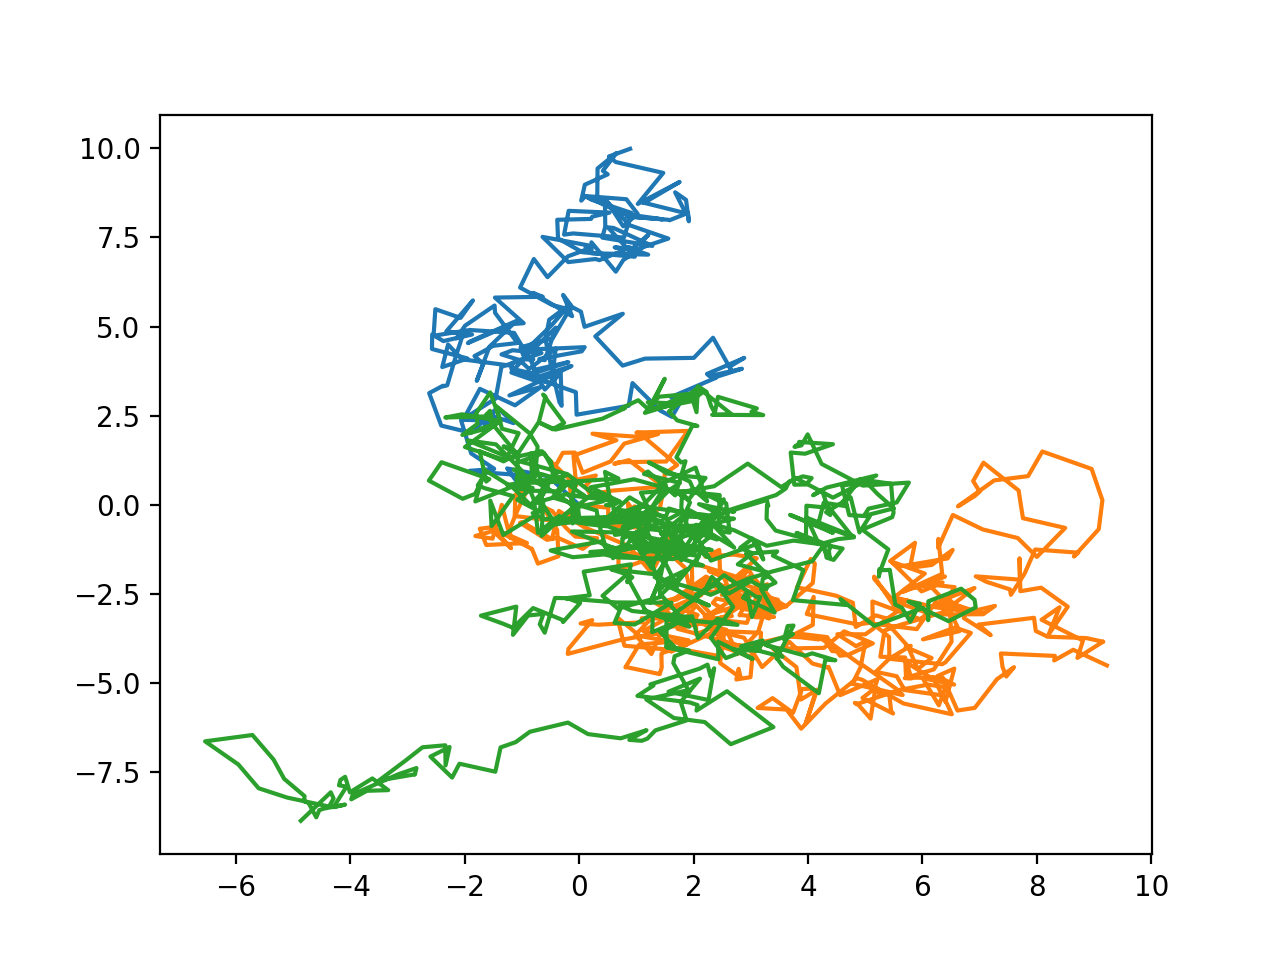

In [ ]:
%matplotlib notebook
from matplotlib import pyplot as plt
import random, math
def particle_generator():
    x_pos = 0
    y_pos = 0
    yield x_pos, y_pos
    while 1:
        magnitude_move = random.random()
        angle_move = random.random() * 2*math.pi
        x_diff = magnitude_move * math.cos(angle_move)
        y_diff = magnitude_move * math.sin(angle_move)
        x_pos += x_diff
        y_pos += y_diff
        yield x_pos, y_pos
        if (x_pos**2 + y_pos**2)**0.5 > 10:
            break

for _ in range(3):
    positions = [pos for pos in particle_generator()]
    # Yeah, this next line is a bit nasty. Might have been clearer to write a loop here, but this form is kind of cute.
    # Google the zip function, and google how to invert the zip function!
    pos1, pos2 = zip(*positions)
    plt.plot(pos1, pos2)

### Exercise 2

(Courtesy of codesignal.com, https://app.codesignal.com/arcade/python-arcade/lambda-illusions/eP7hJDmLdZym2Kdo3)

"""
You've been preparing all night for the upcoming test and entered the class certain that you will ace it. Now that you received the test questions, you died inside a little: looks like you prepared for the test on a completely different topic.

You're not even sure if you should bother to answer the questions. You still have some hope though: it is known that there's a glitch in the test preparing system, so that if the sum of digits of question ids is divisible by k, the answer to each question has a 90% probability to be an A.

Given the list of question ids, determine if the sum of their digits is divisible by k to see if it's worth trying to pass the test.
"""

To solve this problem you must write a lambda function in the space indicated. You *must not* add any additional lines to solve this!


### Exercise 3

(From https://www.w3resource.com/)

Write a Python program to calculate the value of 'a' to the power 'b'. Do not use the `**` operator, the `pow` function `math.pow`, equivalent numpy functions or anything else that already does this for you.

Assume that b is an integer, and implement this using only the multiply `*` operator. Can you write a solution:

1. Using recursion
1. Not using recursion

Which do you prefer?

### Exercise 4

Given a string, write a function to return all unique palindromic (https://en.wikipedia.org/wiki/Palindrome) subtrings (https://en.wikipedia.org/wiki/Substring) sorted according to the scrabble value of each of the substrings (if the scrabble score is equal, it should be alphabetically sorted). By this we mean if the string is "arsfgfsgh", the output should be `['a', 'r', 's', 'g', 'f', 'fgf', 'sfgfs']`. These are all the possible substrings of the input which are palindromes and they ordered in increasing values of the scrabble score (a = 1, r = 1, s = 1, g = 2, f = 4, fgf = 10, sfgfs = 12).

Some other examples and outputs:

* Input: 'cabca'; Output: `['a', 'b', 'c']`
* Input: 'ccccccccccc'; Output: `['c', 'cc', 'ccc', 'cccc', 'ccccc', 'cccccc', 'ccccccc', 'cccccccc', 'ccccccccc', 'cccccccccc']`
* Input: 'abacabaabacab'; Output: `['a', 'aa', 'b', 'c', 'aba', 'aca', 'baab', 'abaaba', 'bacab', 'abacaba', 'cabaabac', 'acabaabaca']`
* Input: 'zazazaza'; Output: `['a', 'z', 'aza', 'zaz', 'azaza', 'zazaz', 'zazazaz']`
* Input: 'shjzzovuzvabrcrfxemkhbiguanipxaxrnybexth'; Output: `['a', 'e', 'i', 'n', 'o', 'r', 's', 't', 'u', 'g', 'b', 'c', 'm', 'p', 'f', 'h', 'v', 'y', 'k', 'rcr', 'j', 'x', 'z', 'xax', 'zz']`

In [ ]:
scrabble_score = {"a": 1 , "b": 3 , "c": 3 , "d": 2 ,
         "e": 1 , "f": 4 , "g": 2 , "h": 4 ,
         "i": 1 , "j": 8 , "k": 5 , "l": 1 ,
         "m": 3 , "n": 1 , "o": 1 , "p": 3 ,
         "q": 10, "r": 1 , "s": 1 , "t": 1 ,
         "u": 1 , "v": 4 , "w": 4 , "x": 8 ,
         "y": 4 , "z": 10}

def palindromic_strings(string, rets=None):
    if rets is None:
        rets = []
    for i in range(1, len(string)+1):
        curr_str = string[:i]
        if curr_str == curr_str[::-1]:
            rets.append(curr_str)
    if len(curr_str) == 1:
        return rets
    palindromic_strings(string[1:], rets=rets)
    return rets


sort_func = lambda x: sum([scrabble_score[i] for i in x])

def print_example(input_string):
    palindroms = set(palindromic_strings(input_string))
    # Alphabetic sort first
    palindroms = sorted(list(palindroms))
    # Then scrabble score sort
    palindroms = sorted(palindroms, key=sort_func)
    print (palindroms)

print_example("arsfgfsgh")
print_example("cabca")
print_example("ccccccccccc")
print_example("abacabaabacab")
print_example("zazazaza")
print_example("shjzzovuzvabrcrfxemkhbiguanipxaxrnybexth")


['a', 'r', 's', 'g', 'f', 'h', 'fgf', 'sfgfs']
['a', 'b', 'c']
['c', 'cc', 'ccc', 'cccc', 'ccccc', 'cccccc', 'ccccccc', 'cccccccc', 'ccccccccc', 'cccccccccc', 'ccccccccccc']
['a', 'aa', 'b', 'c', 'aba', 'aca', 'baab', 'abaaba', 'bacab', 'abacaba', 'cabaabac', 'acabaabaca', 'bacabaabacab']
['a', 'z', 'aza', 'zaz', 'azaza', 'zazaz', 'azazaza', 'zazazaz']
['a', 'e', 'i', 'n', 'o', 'r', 's', 't', 'u', 'g', 'b', 'c', 'm', 'p', 'f', 'h', 'v', 'y', 'k', 'rcr', 'j', 'x', 'z', 'xax', 'zz']
